# HW 2.

- 그림 만들기 (Train 10000, test 1000, label = 0 or 1)  
- output은 0 or 1 (classification)  
- act = sigmoid
- last = Softmax
- iter until < 0.01
- batch 100
- train, test loss graph
- network : hidden layer 3개
    - 첫번째 : 30
    - 두번째 : 1, 2, 5
    - 세번째 : 10

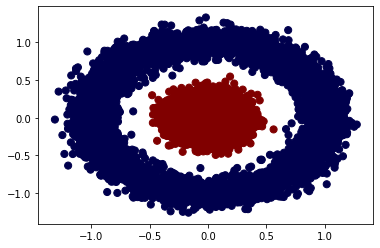

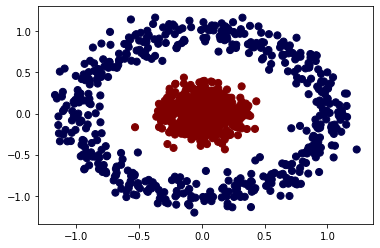

In [2]:
import numpy as np 
from module import *
import sklearn 
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_circles
from sklearn.preprocessing import MinMaxScaler


x_train, y_train = make_circles(10000, noise=0.1, factor=0.2) 
x_test, y_test = make_circles(1000, noise=0.1, factor=0.2)

plt.scatter(x_train[:,0],x_train[:,1], c=y_train, s=50, cmap='seismic')
plt.show()
plt.scatter(x_test[:,0],x_test[:,1], c=y_test, s=50, cmap='seismic')
plt.show()

min_max_scaler = MinMaxScaler()

x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)

def _change_one_hot_label(X):
    T = np.zeros((X.size, 2))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T


y_train = _change_one_hot_label(y_train)
y_test = _change_one_hot_label(y_test)

y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [2]:
hidden_size = [30,5,10]
output_size = 2
loss_type='mse'
act='sigmoid'

net = fc_module(input_size = x_train.shape[1], hidden_size = hidden_size, output_size = output_size, loss_type=loss_type, act=act)

# define hyper parameter
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
test_loss_list = []

iter_per_epoch = max(train_size / batch_size, 1)

i = 0
iter_num = 0

while(True):
    batch_mask = np.random.choice(train_size, batch_size)

    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    grad = net.gradient(x_batch, y_batch)

    for key in ('W1','b1','W2','b2','W3','b3','W4','b4'):
        net.params[key] -= learning_rate * grad[key]

    loss = net.loss(x_batch, y_batch)
    i = i+1

    if i % iter_per_epoch == 0:
        iter_num = iter_num+1
        train_acc = net.accuracy(x_train, y_train)
        test_acc = net.accuracy(x_test, y_test)
        train_loss = net.loss(x_train, y_train)
        train_loss_list.append(train_loss)
        test_loss = net.loss(x_test, y_test)
        test_loss_list.append(test_loss)

        if iter_num % 100 == 0:
            print(iter_num,'-> train_loss :',train_loss,'test_loss:',test_loss)
            print('train_acc:',train_acc,'test_acc:',test_acc)
        if train_loss<0.01:
            print('loss_train_final:',train_loss, 'loss_test_final:',test_loss)
            break


100 -> train_loss : 0.2506500245269116 test_loss: 0.25064928141671394
train_acc: 0.5 test_acc: 0.5
200 -> train_loss : 0.2501328013034054 test_loss: 0.2501328731262361
train_acc: 0.5 test_acc: 0.5
300 -> train_loss : 0.25077118026140005 test_loss: 0.2507710793749201
train_acc: 0.5 test_acc: 0.5
400 -> train_loss : 0.2507239238690812 test_loss: 0.2507238943520546
train_acc: 0.5 test_acc: 0.5
500 -> train_loss : 0.25069590158005317 test_loss: 0.2506958869559136
train_acc: 0.5 test_acc: 0.5
600 -> train_loss : 0.25000329171489527 test_loss: 0.2500014114302111
train_acc: 0.5 test_acc: 0.5
700 -> train_loss : 0.2522433190765013 test_loss: 0.25222113067119434
train_acc: 0.5 test_acc: 0.5
800 -> train_loss : 0.2512034510087201 test_loss: 0.25118167029840904
train_acc: 0.5 test_acc: 0.5
900 -> train_loss : 0.2502764414766476 test_loss: 0.25027391946724026
train_acc: 0.5 test_acc: 0.5
1000 -> train_loss : 0.2504135327000972 test_loss: 0.25038866117363584
train_acc: 0.5 test_acc: 0.5
1100 -> tra

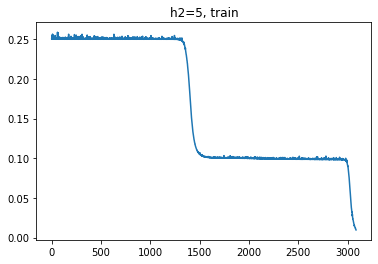

In [3]:
plt.plot(train_loss_list)
plt.title('h2=5, train')
plt.show()

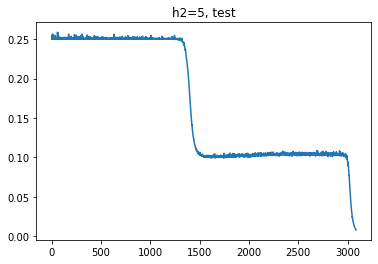

In [4]:
plt.plot(test_loss_list)
plt.title('h2=5, test')
plt.show()